In [104]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, accuracy_score
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import fetch_openml
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import SimpleRNN, Dense, LSTM
from tensorflow.keras.models import Sequential
from google.colab import drive

# QUESTION 1
 (a) (10 pts.) Calculate the first two principal components of the Scikit-learn / UCI ML
repository Wine Dataset using Scikit’s PCA algorithm.

In [22]:
wine = load_wine()
X = wine.data
y = wine.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pc1, pc2 = X_pca[:, 0], X_pca[:, 1]

print(f'PC1: {pc1[:]}')
print(f'PC1: {pc2[:]}')

PC1: [ 3.31675081  2.20946492  2.51674015  3.75706561  1.00890849  3.05025392
  2.44908967  2.05943687  2.5108743   2.75362819  3.47973668  1.7547529
  2.11346234  3.45815682  4.31278391  2.3051882   2.17195527  1.89897118
  3.54198508  2.0845222   3.12440254  1.08657007  2.53522408  1.64498834
  1.76157587  0.9900791   1.77527763  1.23542396  2.18840633  2.25610898
  2.50022003  2.67741105  1.62857912  1.90269086  1.41038853  1.90382623
  1.38486223  1.12220741  1.5021945   2.52980109  2.58809543  0.66848199
  3.07080699  0.46220914  2.10135193  1.13616618  2.72660096  2.82133927
  2.00985085  2.7074913   3.21491747  2.85895983  3.50560436  2.22479138
  2.14698782  2.46932948  2.74151791  2.17374092  3.13938015 -0.92858197
 -1.54248014 -1.83624976  0.03060683  2.05026161 -0.60968083  0.90022784
  2.24850719  0.18338403 -0.81280503  1.9756205  -1.57221622  1.65768181
 -0.72537239  2.56222717  1.83256757 -0.8679929   0.3700144  -1.45737704
  1.26293085  0.37615037  0.7620639   1.0345779

(b) (10 pts.) What is the explained variance ratio of the first two principal components?

In [23]:
explained_variance_ratio = pca.explained_variance_ratio_[:2]
print(f'PC1 EVR: {explained_variance_ratio[0]:.3f}')
print(f'PC2 EVR: {explained_variance_ratio[1]:.3f}')

PC1 EVR: 0.362
PC2 EVR: 0.192


(c) (10 pts.) Use the first two principal components to train a SVM classifier to classify
the wines into three classes. Use a 60%-40% split for the train set and the test set.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.4, random_state=42, stratify=y)

svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.3f}')

Accuracy: 0.944


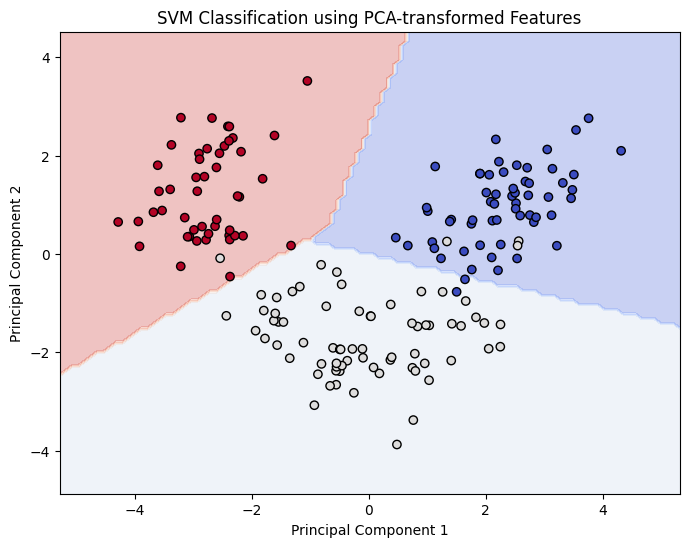

In [29]:
plt.figure(figsize=(8, 6))

x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Classification using PCA-transformed Features')
plt.show()

(d) (10 pts.) Compare the accuracy, precision and recall of the SVM classifier with
that of a decision tree classifier that classifies the wines in to three classes using
the original features. Use the same 60%-40% split for the train set and the test set
for the decision tree classifier and use max_depth=3.

In [36]:
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_classifier.fit(X_train, y_train)

y_pred_dt = dt_classifier.predict(X_test)

svm_report = classification_report(y_test, y_pred, output_dict=True)
dt_report = classification_report(y_test, y_pred_dt, output_dict=True)

svm_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": np.mean([svm_report[str(i)]['precision'] for i in range(3)]),
    "Recall": np.mean([svm_report[str(i)]['recall'] for i in range(3)])
}

dt_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_dt),
    "Precision": np.mean([dt_report[str(i)]['precision'] for i in range(3)]),
    "Recall": np.mean([dt_report[str(i)]['recall'] for i in range(3)])
}

svm_metrics = {k: float(round(v, 3)) for k, v in svm_metrics.items()}
dt_metrics = {k: float(round(v, 3)) for k, v in dt_metrics.items()}

print("SVM Metrics:", svm_metrics)
print("Decision Tree Metrics:", dt_metrics)

SVM Metrics: {'Accuracy': 0.944, 'Precision': 0.949, 'Recall': 0.949}
Decision Tree Metrics: {'Accuracy': 0.931, 'Precision': 0.939, 'Recall': 0.932}


(e) (5 pts.) Plot the decision tree classifier.

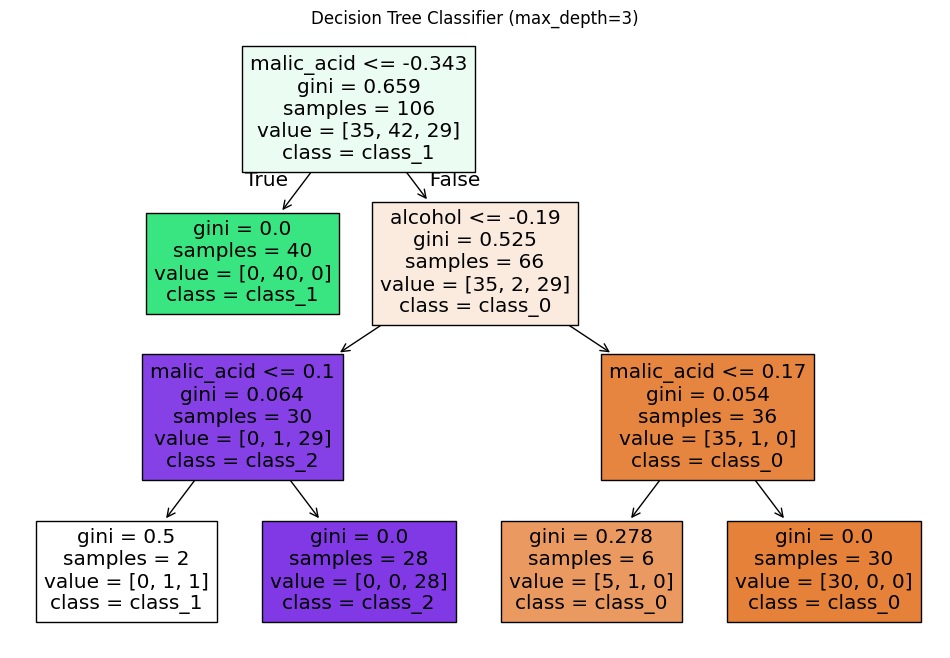

In [38]:
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, feature_names=wine.feature_names, class_names=wine.target_names, filled=True)
plt.title("Decision Tree Classifier (max_depth=3)")
plt.show()

# QUESTION 2
(15 pts.) Calculate the feature importance of the pixels in the images of the CIFAR-10
dataset (combine train and test sets) using a random forest classifier.

In [44]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0).ravel()

X_flat = X.reshape(X.shape[0], -1)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_classifier.fit(X_flat, y)

RandomForestClassifier(n_jobs=-1, random_state=42)

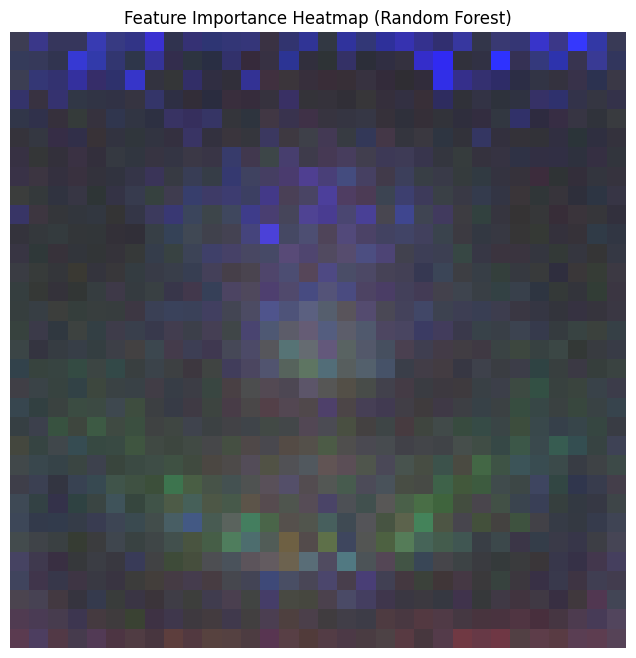

In [51]:
feature_importances = rf_classifier.feature_importances_

importance_image = feature_importances.reshape(32, 32, 3)

plt.figure(figsize=(8, 8))
plt.imshow(importance_image / np.max(importance_image),cmap='hot')
plt.title("Feature Importance Heatmap (Random Forest)")
plt.axis("off")
plt.show()

# QUESTION 3
 (40 pts.) Import the surface temperature data, surface_temp.npy, for a small sphere from
LMS. The temperature data is given for 1000 timesteps. Predict the temperatures for the
next 10 timesteps using a recurrent neural network.


In [95]:
drive.mount('/content/drive')
surface_temp = np.load('/content/drive/MyDrive/ML/surface_temp.npy')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [107]:
surface_temp_x = (surface_temp - np.min(surface_temp)) / (np.max(surface_temp) - np.min(surface_temp))

sequence_length = 50
X, y = [], []
for i in range(len(surface_temp_x) - sequence_length):
    X.append(surface_temp_x[i:i + sequence_length])
    y.append(surface_temp_x[i + sequence_length])

X = np.array(X)
y = np.array(y)

X = X.reshape((X.shape[0], X.shape[1], 1))

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = Sequential()
model.add(SimpleRNN(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0457 - val_loss: 0.0241
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0191 - val_loss: 0.0153
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0180 - val_loss: 0.0145
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0132 - val_loss: 0.0118
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0125 - val_loss: 0.0108
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0113 - val_loss: 0.0102
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0113 - val_loss: 0.0097
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0089 - val_loss: 0.0109
Epoch 9/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0085 - val_loss: 0.0089
Epoch 10/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0089 - val_loss: 0.0086
Epoch 11/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0074 - val_loss: 0.0091
Epoch 12/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0079 - val_l

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


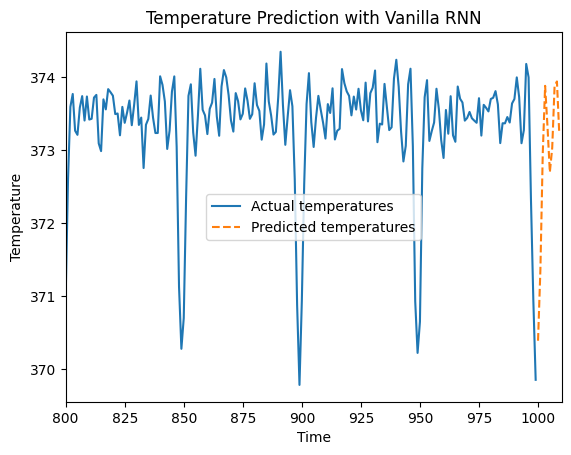

In [108]:
predictions = []
current_input = X_test[-1]

for _ in range(10):
    next_temp = model.predict(current_input.reshape(1, sequence_length, 1))
    predictions.append(next_temp[0][0])
    current_input = np.roll(current_input, -1)
    current_input[-1] = next_temp

predictions = np.array(predictions)
predictions = predictions * (np.max(surface_temp) - np.min(surface_temp)) + np.min(surface_temp)

actual_temp = surface_temp_x * (np.max(surface_temp) - np.min(surface_temp)) + np.min(surface_temp)

plt.plot(range(len(actual_temp)), actual_temp, label='Actual temperatures')
plt.plot(range(len(actual_temp), len(actual_temp) + 10), predictions, label='Predicted temperatures', linestyle='--')
plt.legend()
plt.title("Temperature Prediction with Vanilla RNN")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.xlim(800, len(actual_temp) + 10)
plt.show()

Note: LSTM model also predicted okay values but the plot was more curved which doesn't resemble the data unlike the simplernn